## Portfolio Project: Biodiversity in National Parks

The data for this project was provided by Codecademy as part of the Data Science Foundations course.
Rather than present this in a formal report format (e.g. something that would be present to stakeholders of the national parks), I have elected to structure it so that it shows my process of loading, exploring, cleaning, analysing and visualising the data. As I do this, I will share my observations and reasons for the steps I take in completing this project.

The data is contained in two csv files. Per codecademy, these are:
 - `observations.csv` - holds recorded sightings of different species at several national parks for the past 7 days.
 - `species_info.csv` - contains data about different species and their conservation status.

**First step:** load data into Pandas dataframes for initial inspection.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
obs_df = pd.read_csv('observations.csv')
species_df = pd.read_csv('species_info.csv')

**Second step:** inspect dataset.

In [77]:
print(obs_df.head(10))
print(species_df.head(10))

                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
7       

Initial observation is that there is a common variable between the two tables - `scientific_name`.
This could be useful for merging dataframes, if necessary.

In [78]:
print(obs_df.info())
print(species_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


Only column out of the two dataframes with null values is `conservation_status`. It is likely that these NaN values represent species without any conservation status attached, rather than missing data.

In [79]:
print(obs_df.value_counts('scientific_name'))
print(obs_df.value_counts('park_name'))
print(species_df.value_counts('scientific_name'))

scientific_name
Canis lupus                            12
Holcus lanatus                         12
Puma concolor                          12
Myotis lucifugus                       12
Castor canadensis                      12
                                       ..
Equisetum laevigatum                    4
Equisetum hyemale ssp. affine           4
Equisetum fluviatile                    4
Epipactis gigantea                      4
Zygodon viridissimus var. rupestris     4
Length: 5541, dtype: int64
park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64
scientific_name
Canis lupus                            3
Holcus lanatus                         3
Puma concolor                          3
Myotis lucifugus                       3
Castor canadensis                      3
                                      ..
Equisetum laevigatum              

Can see there are 5824 observations for each national park, which matches the 5824 different observations in the species dataframe. This indicates each species has an entry in each national park. Can also see there are duplicates of scientific_names in both dataframes.

In [80]:
print(species_df.describe())

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  


Of the 5824 scientific names in the species df, there are only 5541 unique. Some are repeated up to 3 times (also shown in the value_counts function). This does not align with the number of unique common names (5504), which indicates some duplicates are a result of observations with different common names for the same scientific name.

Additionally, there are 4 unique conservation statuses, and 7 unique animal categories. These are explored below.

In [81]:
species_df.groupby('conservation_status').size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [82]:
species_df.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

No particular observations at this stage. Will perform exploratory data analysis on these variables later.

**Third step:** clean dataset.

The next step will be to explore and remove the duplicates identified above.
Following this, the two dataframes will be merged on their shared variable `scientific_name`.
First, the observations dataframe will be inspected for observations where the whole row is a duplicate. 

In [83]:
#Will mark all duplicates as True by using keep=False.
obs_dup = obs_df.duplicated(keep=False)
print(obs_df[obs_dup==True])


              scientific_name                            park_name  \
365            Plantago major  Great Smoky Mountains National Park   
513             Arctium minus               Yosemite National Park   
627        Spilogale putorius            Yellowstone National Park   
1020     Eleocharis palustris  Great Smoky Mountains National Park   
1032      Hesperis matronalis                  Bryce National Park   
1454   Echinochloa crus-galli  Great Smoky Mountains National Park   
1635    Streptopelia decaocto            Yellowstone National Park   
4178     Monotropa hypopithys  Great Smoky Mountains National Park   
4527   Botrychium virginianum            Yellowstone National Park   
7219        Prunella vulgaris  Great Smoky Mountains National Park   
7263   Echinochloa crus-galli  Great Smoky Mountains National Park   
8710    Streptopelia decaocto            Yellowstone National Park   
10038          Plantago major  Great Smoky Mountains National Park   
10674           Arct

The above shows the small segment of the dataframe where the entire observation is a duplicate, including the exact number of observations. I am interested to see the number of duplicates where there are different numbers of observations to see if there are substantially more. Therefore, I will select data where only `scientific_name` and `park_name` are duplicates. 

In [84]:
obs_dup = obs_df.duplicated(subset=['scientific_name', 'park_name'], keep=False)
print(obs_df[obs_dup == True])

              scientific_name                            park_name  \
15              Lunaria annua  Great Smoky Mountains National Park   
22           Elodea nuttallii               Yosemite National Park   
25     Amaranthus retroflexus            Yellowstone National Park   
27          Scirpus cyperinus  Great Smoky Mountains National Park   
30           Glyceria striata               Yosemite National Park   
...                       ...                                  ...   
23258    Microtus longicaudus            Yellowstone National Park   
23259         Agrostis scabra                  Bryce National Park   
23267      Oxalis corniculata               Yosemite National Park   
23273      Dactylis glomerata                  Bryce National Park   
23280      Botrychium simplex            Yellowstone National Park   

       observations  
15               65  
22              158  
25              247  
27               73  
30              117  
...             ...  
23258

There are a significant number of duplicates of the same species and national park. Interested to explore a couple of examples for context.

In [85]:
print(obs_df[(obs_df['scientific_name']=='Scirpus cyperinus') & (obs_df['park_name']=='Great Smoky Mountains National Park')])

print(obs_df[(obs_df['scientific_name']=='Dactylis glomerata') & (obs_df['park_name']=='Bryce National Park')])

print(obs_df[(obs_df['scientific_name']=='Microtus longicaudus') & (obs_df['park_name']=='Yellowstone National Park')])

         scientific_name                            park_name  observations
27     Scirpus cyperinus  Great Smoky Mountains National Park            73
21402  Scirpus cyperinus  Great Smoky Mountains National Park            77
          scientific_name            park_name  observations
8289   Dactylis glomerata  Bryce National Park           105
23273  Dactylis glomerata  Bryce National Park            89
            scientific_name                  park_name  observations
1092   Microtus longicaudus  Yellowstone National Park           218
23258  Microtus longicaudus  Yellowstone National Park           244


It is difficult to know how to correctly treat these duplicates for the purposes of accurate and insightful analysis. Ordinarily, I would send some queries to the organisation responsible for collecting the data to ascertain the cause of the duplicates. Since that option is not available, I am left to theorise as to the cause.

I have two theories about why there are duplicate entries of the same scientific names in the same national park: <br>
1. These observations were captured by different observers (e.g. two different national park employees) <br>
2. These observations are actually of slightly different species, but with the same scientific name. <br>

After some brief research, I found that, by design, two species cannot have the same scientific name (i.e. latin name). Therefore, my first theory is the most plausible I have available. This is supported by the examples directly above, which show a relatively similar number of observations. If the duplicates are due to separate observers, it makes sense that they would capture a similar number of observations of the same species. Indeed, I showed many examples further above where the entire row was a duplicate, including the exact number of observations.

I would like to explore this a little further before commencing data analysis, as information about the duplicates in the collected data would still be valuable to stakeholders (e.g. the national parks organisations), particularly when it comes to the procedures for data collection. If they can cut down on duplicated efforts in data collection it will make more efficient use of their employees' time and save the cost of a data analyst spending time cleaning the dataset.

I am interested to see if the rows in the dataframe that are complete duplicates occur mainly with species that are plants. Plants, presumably, remain in the same location for the seven day period, whereas animals do not. If my theory is correct, that would make it far more likely that plants would be observed the exact same number of times by different observers. 

As I have not merged the two dataframes yet, I will perform this by finding the segment of the species dataframe where the `scientific_name` matches those in the observations dataframe that are complete duplicates.

The initial inspection showed that the indices don't align between the two dataframes. Will have to access rows in the species dataframe using labels in `scientific_name` column. Will assign a separate variable for the segment of the observations dataframe with exact duplicates only.

In [86]:
obs_dup = obs_df.duplicated(keep=False)
exact_dup = obs_df[obs_dup == True]
exact_dup_species = species_df[species_df['scientific_name'].isin(list(exact_dup['scientific_name']))]
print(exact_dup_species)
#Compare plant vs non-plant counts
print(exact_dup_species.value_counts(subset='category', normalize=True))
print(exact_dup_species.count())

            category         scientific_name  \
18            Mammal      Spilogale putorius   
743   Vascular Plant           Arctium minus   
768   Vascular Plant       Cichorium intybus   
1049  Vascular Plant     Hesperis matronalis   
1249  Vascular Plant    Monotropa hypopithys   
1398  Vascular Plant     Trifolium campestre   
1585  Vascular Plant       Prunella vulgaris   
1672  Vascular Plant          Plantago major   
1913  Vascular Plant  Botrychium virginianum   
2079  Vascular Plant    Eleocharis palustris   
2216  Vascular Plant  Echinochloa crus-galli   
2290  Vascular Plant           Poa compressa   
2512  Vascular Plant    Potentilla norvegica   
3077            Bird   Streptopelia decaocto   
3140            Bird   Streptopelia decaocto   
3405  Vascular Plant           Arctium minus   
3432  Vascular Plant       Cichorium intybus   
3641  Vascular Plant     Hesperis matronalis   
3804  Vascular Plant    Monotropa hypopithys   
3868  Vascular Plant     Trifolium campe

The above shows that a large majority of the species that were complete duplicates are vascular plants. However, it is important to note that a large majority of the species in the whole dataset are vascular plants. Accordingly, I am not prepared to claim that this analysis of complete duplicates supports or detracts from my theory of separate observers. Further, while a sample size of 31 can be large enough to be statistically significant, it is still only a very small proportion of the 5824 total observations in the species dataframe, and I do not think further analysis on this relationship will result in any valuable insight.

The final observation in support of my theory is that the duplicates in the `scientific_name` column in the species dataframe above all have slightly different entries in the `common_names` column. As we can see above, there is more discretion available when entering values in the common names column, as species can have multiple common names. It seems highly likely that two different observers would provide a combination of different common names in some instances.

The conclusion I have made after the analysis above is to drop the duplicate observations of the same species in the same national park. Specifically, I will keep the first observation and drop the following duplicates. The primary reason for this is that having one or more duplicates would increase the total observation count for those species in those parks. When doing exploratory data analysis, this could be misleading when making comparisons against species/parks without duplicates. By taking the first observation and dropping the duplicates, it will make them most consistent with the rest of the dataset.

In [87]:
#First, confirm how many will be dropped by making keep = 'first' (default)
obs_dup = obs_df.duplicated(subset=['scientific_name', 'park_name'])
print(obs_df[obs_dup == True])
#Next, use drop_duplicates()
obs_df.drop_duplicates(subset=['scientific_name', 'park_name'], inplace=True)
print(obs_df.info())

diff = 23296 - 22164
print(diff)

            scientific_name                  park_name  observations
483       Agrostis gigantea  Yellowstone National Park           235
490      Agrostis mertensii     Yosemite National Park           128
945           Rumex crispus  Yellowstone National Park           255
1213      Dianthus barbatus        Bryce National Park           110
1259        Riparia riparia        Bryce National Park            91
...                     ...                        ...           ...
23258  Microtus longicaudus  Yellowstone National Park           244
23259       Agrostis scabra        Bryce National Park           118
23267    Oxalis corniculata     Yosemite National Park           164
23273    Dactylis glomerata        Bryce National Park            89
23280    Botrychium simplex  Yellowstone National Park           241

[1132 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  D

**Fourth step:** Merge dataframes
The final step in making the dataset ready for exploratory data analysis is to merge the species and observations dataframes into one. This will make it easier to visualise and perform statistical analysis on.

I wish to keep all rows in the new observations dataframe with the dropped duplicates and merge only rows from the species dataframe that have the same scientific name. Will use a left merge to accomplish this.

In [88]:
full_info = obs_df.merge(species_df, how = 'left', on = 'scientific_name')
print(full_info.info())
print(full_info[(full_info['scientific_name'] == 'Agrostis gigantea') & (full_info['park_name'] == 'Yellowstone National Park')])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23296 entries, 0 to 23295
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      23296 non-null  object
 1   park_name            23296 non-null  object
 2   observations         23296 non-null  int64 
 3   category             23296 non-null  object
 4   common_names         23296 non-null  object
 5   conservation_status  764 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB
None
       scientific_name                  park_name  observations  \
498  Agrostis gigantea  Yellowstone National Park           253   
499  Agrostis gigantea  Yellowstone National Park           253   

           category                         common_names conservation_status  
498  Vascular Plant                               Redtop                 NaN  
499  Vascular Plant  Black Bent, Redtop, Water Bentgrass                 NaN  


The error I made, and explored, above is that the duplicates I dropped previously still had their corresponding entries in the species dataframe. This means that there were still duplicates in the species dataframe which merged in to create new rows. The example I explored shows that the same observation was duplicated with different common names. This is why the number of entries in the full_info dataframe jumped back to 23296, rather than 22164.

This is an easy fix, as I will simply repeat the drop_duplicates() function with the full_info dataframe.

In [89]:
full_info.drop_duplicates(subset=['scientific_name', 'park_name'], inplace=True)
print(full_info.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 23295
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      22164 non-null  object
 1   park_name            22164 non-null  object
 2   observations         22164 non-null  int64 
 3   category             22164 non-null  object
 4   common_names         22164 non-null  object
 5   conservation_status  712 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB
None


**Fifth step:** Exploratory Data Analysis (EDA)<br>
For me, the most interesting engaging part of working with this dataset has been in the inspecting and cleaning stages above. I have a pretty good understanding of the dataset and do not think there will be many interesting insights available from EDA. For completeness, I will still produce a few visualisations below. This will at least show that the dataframe was effectively cleaned and merged for use in EDA.

The three plots I will produce are:
- Bar plot showing total number of observations per category of species
- Bar plot showing total number of observations per category of species, also separated by national park
- Box plot showing spread in number of observations for each conservation status

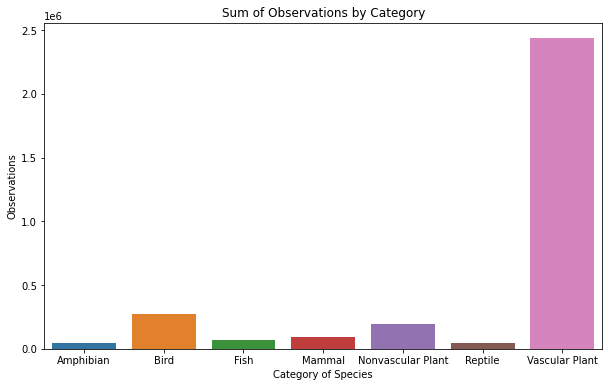

<Figure size 432x288 with 0 Axes>

In [108]:
# Group by category and sum the observations
full_info_sum = full_info.groupby('category')['observations'].sum().reset_index()

# Create a figure with a custom size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar plot with the aggregated data
sns.barplot(data=full_info_sum, x='category', y='observations', ax=ax)
plt.title('Sum of Observations by Category')
plt.xlabel('Category of Species')
plt.ylabel('Observations')
plt.show()
plt.clf()

As seen on initial inspection of dataset, vascular plant has significantly more observations than any other category of species. 

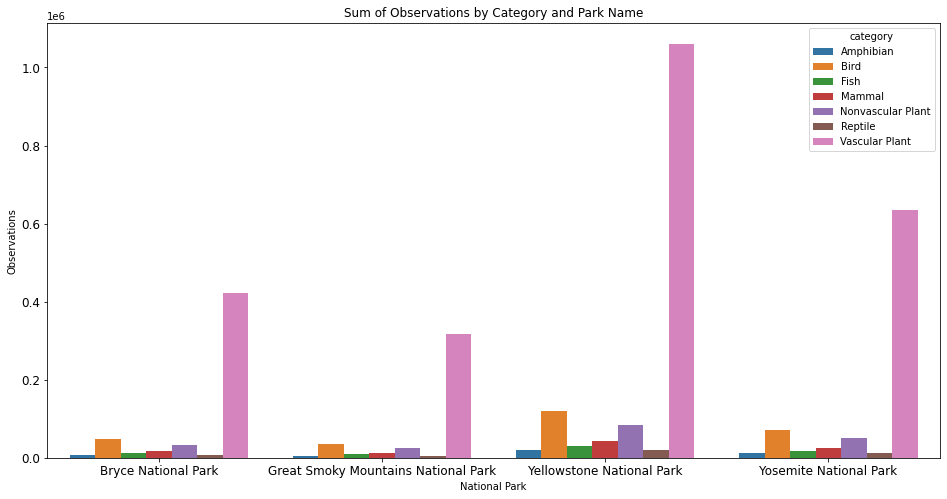

<Figure size 432x288 with 0 Axes>

In [112]:
# Group by category and park_name and sum the observations
full_info_sum = full_info.groupby(['category', 'park_name'])['observations'].sum().reset_index()

# Create a figure with a custom size
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the bar plot with the aggregated data and hue by park_name
sns.barplot(data=full_info_sum, x='park_name', y='observations', hue='category', ax=ax)
plt.title('Sum of Observations by Category and Park Name')
plt.xlabel('National Park')
plt.ylabel('Observations')

# Adjust the font size of the axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
plt.clf()

The difference in observations across species seems to be fairly well repliacted across the four national parks.

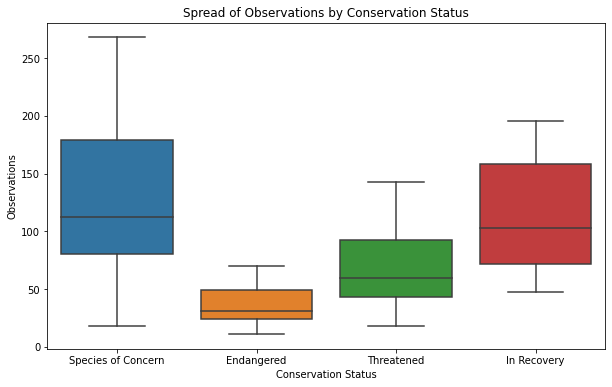

<Figure size 432x288 with 0 Axes>

In [114]:
# Create a figure with a custom size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the box plot with the data
sns.boxplot(data=full_info, x='conservation_status', y='observations', ax=ax)
plt.title('Spread of Observations by Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Observations')

plt.show()
plt.clf()

Can see that endangered species have a much tighter spread in number of obserations. Species of concern has a much larger spread.

I think, in general, the number of observations required to be given any of the above conservation statuses would vary across species. I will roughly explore this notion below by adding a third variable 'category' to the box plot.

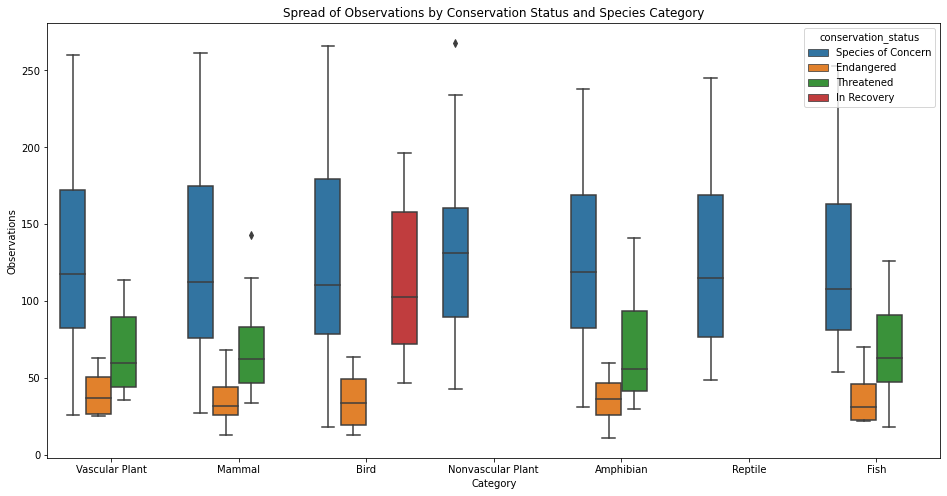

<Figure size 432x288 with 0 Axes>

In [118]:
# Create a figure with a custom size
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the box plot with the data
sns.boxplot(data=full_info, x='category', y='observations', hue='conservation_status', ax=ax)
plt.title('Spread of Observations by Conservation Status and Species Category')
plt.xlabel('Category')
plt.ylabel('Observations')

plt.show()
plt.clf()

Despite some species not having certain conservation statuses, the box plots do appear quite comparable across species. For example, the inter-quartile range of observations for those declared endangered tends to be around 30 - 50.

There certainly are not any that vary significantly between species. Perhaps my initial thinking is incorrect and there is a range of observations that is a uniform criteria for conservation statuses across species.

This is where I will conclude this open-ended portfolio project.

The most valuable part of this project was practicing my skills in data wrangling through inspecting and cleaning the dataset. I also believe that the work I did in analysing the duplicate data could be the most valuable to stakeholders if this were an actual report. As mentioned, improving data collection processes could be very beneficial in reducing costs in the future.